If you have one hidden layer then it is called Neural Network.

And if you have two or more hiddenl layer then it is called deep NN.

The tensorflow core r2.0 have enabled eager execution by default so doesn't need to write tf.compat.v1.Session() and use .run() function

The act of sending the data straight through our network means we're operating a feed forward neural network. The adjusting of weights backwards is our back propagation.

We do this feeding forward and back propagation however many times we want. The cycle (feed forward + back propagation) is called an epoch. We can pick any number we like for the number of epochs, but you would probably want to avoid too many, causing overfitment.

The bias is a value that is added to our sums(node * weights), before being passed through the activation function.
The purpose of the bias here is mainly to handle for scenarios where all neurons fired a 0 into the layer. And nuron*weights (0 * weights) = 0. Then the value become 0 and nothing will pass to next layer which is called 'Dead Neural Network'. A bias makes it possible that a neuron still fires out of that layer. A bias is as unique as the weights, and will need to be optimized too.

# Agal no program work nathi karto niche thi kare 6. Agal no program juna tensorflow related 6 atle

In [1]:
import tensorflow as tf

In [2]:
x1 = 5
y1 = 6
result = x1*y1
print(result)

30


In [3]:
X2 = tf.constant(5)
Y2 = tf.constant(6)

result = (X2*Y2)
print(result)

tf.Tensor(30, shape=(), dtype=int32)


In [4]:
result = tf.multiply(X2,Y2)
print(result)

tf.Tensor(30, shape=(), dtype=int32)


In [5]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])
product = tf.matmul(matrix1, matrix2)
print(product)

tf.Tensor([[12.]], shape=(1, 1), dtype=float32)


# MNIST dataset

In [11]:
'''
one_hot ==  0 = [1,0,0,0,0,0,0,0,0]
            1 = [0,1,0,0,0,0,0,0,0]
            2 = [0,0,1,0,0,0,0,0,0]
            3 = [0,0,0,1,0,0,0,0,0]

'''

import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras

# from tensorflow.examples.tutorials.mnist import input_data
mnist = tf.keras.datasets.mnist
# mnist = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)
print(mnist)

<module 'tensorflow.python.keras.api._v1.keras.datasets.mnist' from 'G:\\Anaconda\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v1\\keras\\datasets\\mnist\\__init__.py'>


In [2]:
n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500

n_classess = 10
batch_size = 100

# height * width
x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float')

In [3]:
def neural_network_model(data):
    #Define dictonari name of 'hidden1_layer'
    #Key weights is tensorflow variable(tf.variable) and then the variable is tensorflow random normal(tf.random_normal)
    #with specific shape.
    hidden1_layer = {'weights': tf.Variable(tf.random_normal([784, n_nodes_hl1])),
                     'biases': tf.Variable(tf.random_normal([n_nodes_hl1]))}
    
    hidden2_layer = {'weights': tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                     'biases': tf.Variable(tf.random_normal([n_nodes_hl2]))}
    
    hidden3_layer = {'weights': tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                     'biases': tf.Variable(tf.random_normal([n_nodes_hl3]))}
    
    output_layer = {'weights': tf.Variable(tf.random_normal([n_nodes_hl3, n_classess])),
                     'biases': tf.Variable(tf.random_normal([n_classess]))}
    
    #(input_data *weights) + biases
    l1 = tf.add(tf.matmul(data, hidden1_layer['weights']) , hidden1_layer['biases'])
    #Activation function = rectifid linear = relu()
    l1 = tf.nn.relu(l1)
    
    l2 = tf.add(tf.matmul(l1, hidden2_layer['weights']) , hidden2_layer['biases'])
    l2 = tf.nn.relu(l2)
    
    l3 = tf.add(tf.matmul(l2, hidden3_layer['weights'] ), hidden3_layer['biases'])
    l3 = tf.nn.relu(l3)
    
    output = tf.matmul(l3, output_layer['weights']) + output_layer['biases']
    
    return output

In [12]:
def train_neural_network(x):
    prediction = neural_network_model(x)
    # OLD VERSION:
    #cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(prediction,y) )
    # NEW:
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    hm_epochs = 10
    with tf.Session() as sess:
        # OLD:
        #sess.run(tf.initialize_all_variables())
        # NEW:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(x_train/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
                epoch_loss += c

            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)

        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))

train_neural_network(x)

ValueError: Dimensions must be equal, but are 64 and 784 for 'MatMul_4' (op: 'MatMul') with input shapes: [?,64], [784,500].

In [25]:
print(tf.placeholder('float', [None, 784]))
hidden1_layer = {'weights': tf.Variable(tf.random_normal([784, n_nodes_hl1])),
                     'biases': tf.Variable(tf.random_normal([n_nodes_hl1]))}

p =  hidden1_layer['weights']
x = tf.placeholder('float', [None, 784])

print(x.shape, p.shape)
x*p


Tensor("Placeholder_21:0", shape=(?, 784), dtype=float32)
(?, 784) (784, 500)


ValueError: Dimensions must be equal, but are 784 and 500 for 'mul_3' (op: 'Mul') with input shapes: [?,784], [784,500].

In [ ]:
# tf.keras.datasets.fashion_mnist.load_data()

In [13]:
# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot
%matplotlib qt
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [7]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [9]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [10]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data
Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 3s 62us/sample - loss: 0.3383 - sparse_categorical_accuracy: 0.9033 - val_loss: 0.1718 - val_sparse_categorical_accuracy: 0.9515
Epoch 2/2
50000/50000 [==============================] - 2s 41us/sample - loss: 0.1553 - sparse_categorical_accuracy: 0.9542 - val_loss: 0.1216 - val_sparse_categorical_accuracy: 0.9656


In [38]:
m = tf.constant([[1],[1]])
n = tf.constant([[4,5],[7,8]])
result = tf.matmul(n,m)
print(result)

Tensor("MatMul_10:0", shape=(2, 1), dtype=int32)


In [39]:
w = [[1],[1]]
z = [[4,5]]
result = tf.matmul(w,z)
print(result)

Tensor("MatMul_11:0", shape=(2, 2), dtype=int32)


# New tensorflow related program

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [2]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
print(y_train[0])

5


In [5]:
# "normalize" your data

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

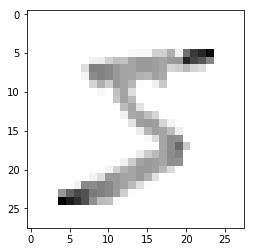

In [6]:
print(x_train[0])
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [9]:
# build our model!

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2629 - accuracy: 0.9228
Epoch 2/3
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1054 - accuracy: 0.9678
Epoch 3/3
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0720 - accuracy: 0.9774


In [10]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.0987 - accuracy: 0.9684
0.09874813420176506
0.9684


In [11]:
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [12]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [13]:
predictions = new_model.predict(x_test)
print(predictions)

[[4.4569668e-09 8.4873328e-08 2.6226894e-06 ... 9.9997759e-01
  5.0949014e-09 9.8356952e-07]
 [2.9530472e-06 9.2397127e-03 9.8954237e-01 ... 1.7907472e-07
  1.8837600e-04 2.7429436e-08]
 [1.1738030e-07 9.9966526e-01 2.2757371e-05 ... 5.0115494e-05
  1.9731138e-04 9.3946483e-07]
 ...
 [8.2796614e-09 2.4560887e-07 3.1242706e-08 ... 1.9083654e-05
  4.4564563e-06 3.8380163e-05]
 [4.4774401e-07 6.1980536e-09 1.2147983e-08 ... 6.1884202e-07
  5.4306746e-04 2.7712552e-08]
 [5.8643941e-08 1.4562724e-07 7.0183326e-08 ... 4.7995385e-10
  1.9598698e-07 5.1331989e-10]]


In [14]:
import numpy as np

print(np.argmax(predictions[0]))

7


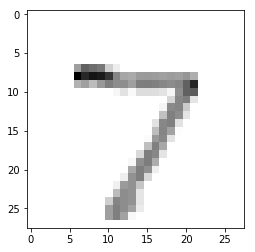

In [15]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()